<a href="https://colab.research.google.com/github/earo12/Business-Forecasting/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

First we have to read the csv file

In [ ]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Let's check if there are some missing values

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
df.shape

(1000, 10)

Here we have two options, drop the missing values or fill them with a method, since we only have 1000 rows we shouldn't use the drop values. So I'll use the second one, to be more specific, I'll use the bfill method in order to fill them with the next non-missing value.

In [ ]:
df.fillna(method = 'bfill', inplace = True)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Let's explore the data, in order to find out what kind of type are the attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Since the column 'Unnamed: 0' doesn't seem to have an specific reason to be in the DataFrame, I won't use it for the next part of the project

In [ ]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

For now, we can see thes features with plots 

In [ ]:
values_sex = df['Sex'].value_counts()
values_saving = df['Saving accounts'].value_counts()
values_checking = df['Checking account'].value_counts()
values_purpose = df['Purpose'].value_counts()

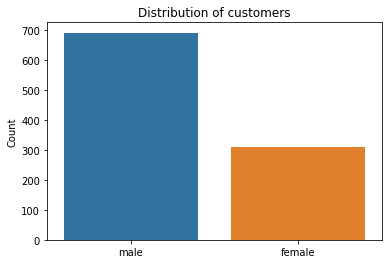

In [ ]:
def graph_sex():
  sns.barplot(data = df, x = values_sex.index, y = values_sex.values)
  plt.ylabel('Count')
  plt.title('Distribution of customers')
  plt.show()

graph_sex()

So, most of the customers are male customers.




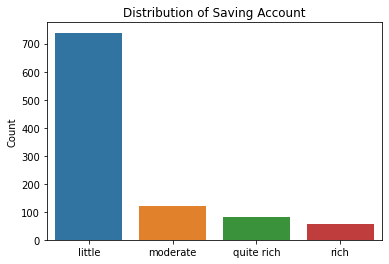

In [ ]:
def graph_saving():
  sns.barplot(data = df, x = values_saving.index, y = values_saving.values)
  plt.ylabel('Count')
  plt.title('Distribution of Saving Account')
  plt.show()

graph_saving()  

Most of the Saving account are little savings

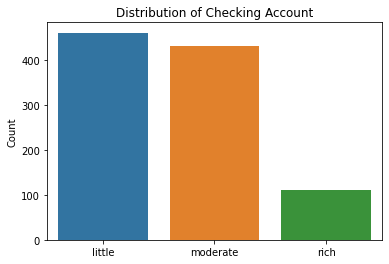

In [ ]:
def graph_checking():
  sns.barplot(data = df, x = values_checking.index, y = values_checking.values)
  plt.ylabel('Count')
  plt.title('Distribution of Checking Account')
  plt.show()

graph_checking()

Here we find that the checking accounts are little ones

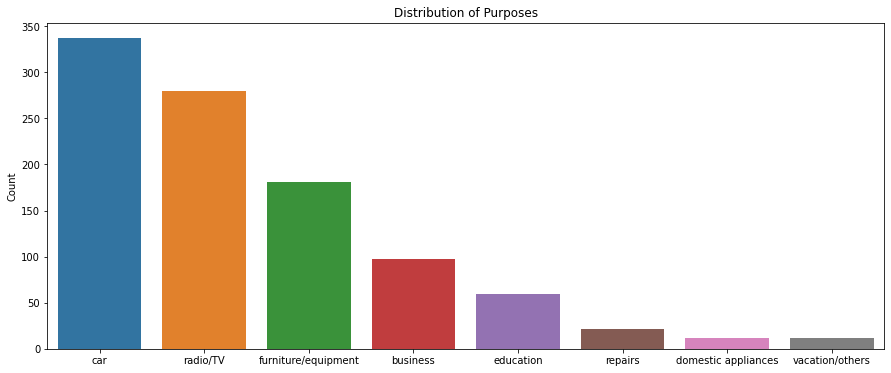

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
def graph_purpose():
  sns.barplot(data = df, x = values_purpose.index, y = values_purpose.values)
  plt.ylabel('Count')
  plt.title('Distribution of Purposes')
  plt.show()

graph_purpose()

The most purpose in the dataset are for cars.

Let's see now the distribution of each age

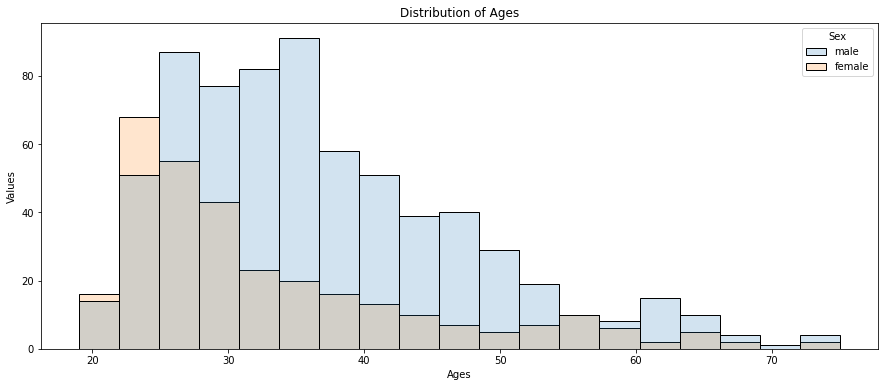

In [ ]:
def age_plot():
  sns.histplot(data = df, x = df['Age'], hue = df['Sex'],alpha = 0.2)
  plt.xlabel('Ages')
  plt.ylabel('Values')
  plt.title('Distribution of Ages')
  plt.show()

age_plot()

From the way of the distribution we can inference that ages have a Xi-squared distribution, whit the mean in the middle of 30's and the median with a larger value.

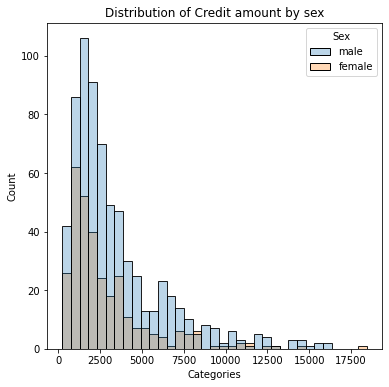

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)

def check_sex():
  sns.histplot(data = df, x = df['Credit amount'], hue = df['Sex'], alpha = 0.3)
  plt.xlabel('Categories')
  plt.ylabel('Count')
  plt.title('Distribution of Credit amount by sex')
  plt.show()

check_sex()  

Here we can see that the categories for each credit amount has a higher value with male customers instead of female customers. 

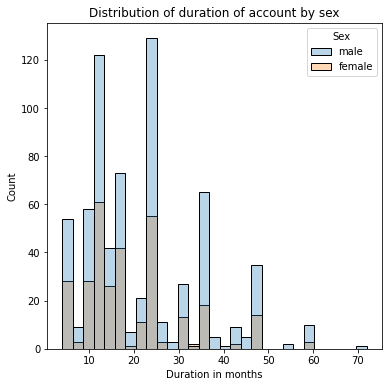

In [ ]:
def hist_duration():
  sns.histplot(data = df, x = df['Duration'], hue = df['Sex'], alpha = 0.3)
  plt.xlabel('Duration in months')
  plt.ylabel('Count')
  plt.title('Distribution of duration of account by sex')
  plt.show()
hist_duration()  

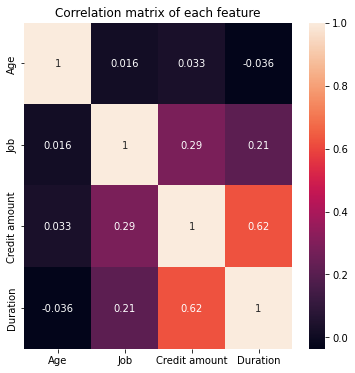

In [ ]:
sns.heatmap(data = df.corr(), annot = True)
plt.title('Correlation matrix of each feature')
plt.show()

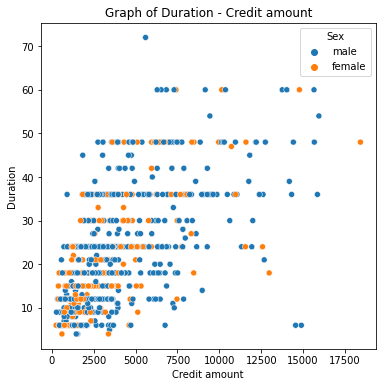

In [ ]:
sns.scatterplot(data = df, x = df['Credit amount'], y = df['Duration'], hue = df['Sex'])
plt.title('Graph of Duration - Credit amount')
plt.show()

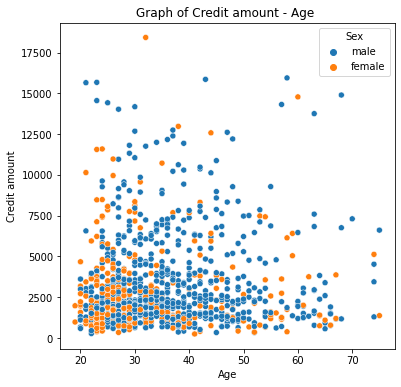

In [ ]:
sns.scatterplot(data = df, x = df['Age'], y = df['Credit amount'], hue = df['Sex'])
plt.title('Graph of Credit amount - Age ')
plt.show()

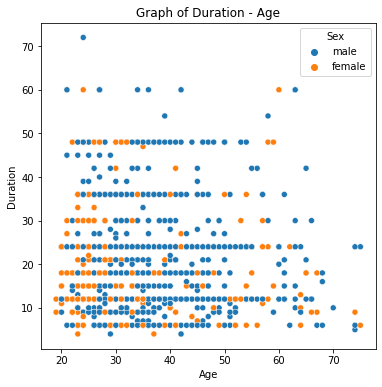

In [ ]:
sns.scatterplot(data = df, x = df['Age'], y = df['Duration'], hue = df['Sex'])
plt.title('Graph of Duration - Age')
plt.show()

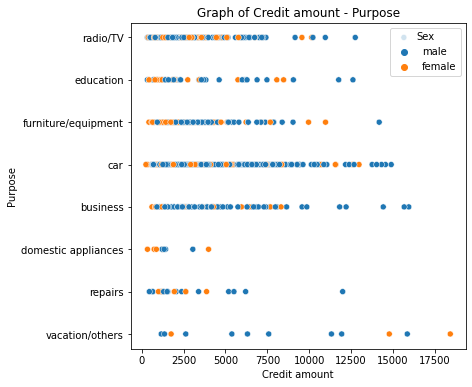

In [ ]:
sns.scatterplot(data = df, x = df['Credit amount'], y = df['Purpose'], hue = df['Sex'])
plt.title('Graph of Credit amount - Purpose')
plt.show()

Here's the summary of each graph with the next code line

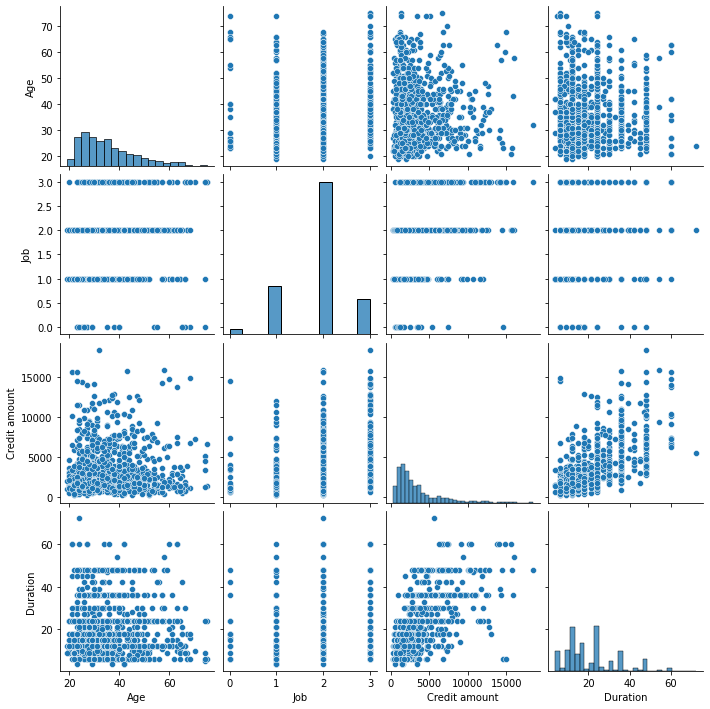

In [ ]:
sns.pairplot(df)

# Training the model

In [ ]:
encoder = LabelEncoder()
df['Purpose'] = encoder.fit_transform(df['Purpose'])
df['Saving accounts'] = encoder.fit_transform(df['Saving accounts'])
df['Checking account'] = encoder.fit_transform(df['Checking account'])
df['Housing'] = encoder.fit_transform(df['Housing'])
df['Sex'] = encoder.fit_transform(df['Sex'])

In [ ]:
df.head() #Sex 1 is for male and 0 is for female

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


From the last shell we have:
Male - 1
Female - 0

In [ ]:
X = np.array(df[['Job', 'Age' , 'Housing' , 'Saving accounts', 'Checking account' ,'Credit amount', 'Duration', 'Purpose']])

In [ ]:
Y = np.array(df['Sex'])

In [ ]:
X_norm = normalize(X)

Let's plot the elbow valuer for KMeans algorithm

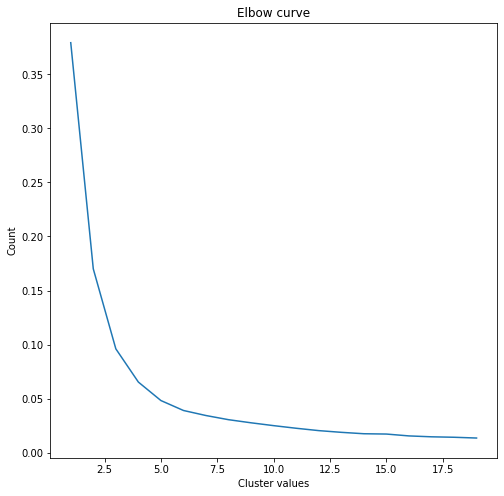

In [ ]:
values = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_norm)
  values.append(kmeans.inertia_)

fig = plt.figure(figsize = (8,8))
plt.plot(range(1, 20), values)
plt.xlabel('Cluster values')
plt.ylabel('Count')
plt.title('Elbow curve')
plt.show()

From the last graph we see that the more cluster values we have the less count it takes, let's build the model of KMeans

In [ ]:
model = KMeans(n_clusters = 2, max_iter = 100000)
ft = model.fit(X_norm)

In [ ]:
y_labels = ft.labels_

In [57]:
y_kmeans = model.predict(X_norm)

In [ ]:
accuracy = metrics.adjusted_rand_score(Y, y_kmeans)

In [ ]:
print(f'Accuracy of the method: {accuracy}')

Accuracy of the method: 0.010987353886758007


In [ ]:
score = model.score(X_norm)
print(f'Score of the model:{score}')

Score of the model:-0.1700500190927734


So far we had a negative score for the model, it doesn't mean at all it's a bad model, to fix this problem I found a coefficient called Silhouette Coefficient, wich takes values in the interval $[-1,1]$, with 1 the best value for the model i.e. a perfect model, and -1 a really bad one, so let's take a look and see whether our model can be a better one or not:

In [ ]:
print(f'New score with Silhouette Coefficient:{silhouette_score(X_norm, y_labels)}')

New score with Silhouette Coefficient:0.6535945986244842


So basically, our model has an intermediate test score, it's not so bad at all. We can check finally the clusters in the model.

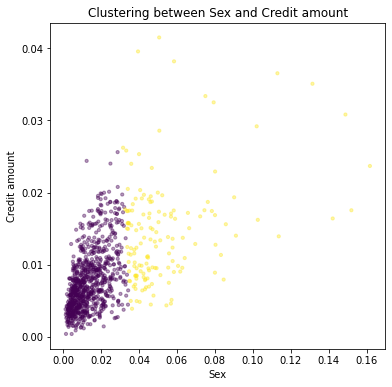

In [87]:
centroids = model.cluster_centers_
plt.scatter(X_norm[:,1], X_norm[:,6], c = y_kmeans, alpha = 0.4, s = 10)
#plt.scatter(centroids[:,0],centroids[:,1], s = 80, color = 'r') # if I put this line I don't find something coherent
#plt.legend(['Male','Female'])
plt.xlabel('Sex', fontsize = 10)
plt.ylabel('Credit amount', fontsize = 10)
plt.title('Clustering between Sex and Credit amount')
plt.show()